### BM25

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
TaylorSwift = pd.read_csv('/Dataset/TaylorSwift.csv',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
TaylorSwift.head(10)

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...
5,5,Taylor Swift,​betty,folklore,2020.0,2020-07-24,betty i won't make assumptions about why you s...
6,6,Taylor Swift,End Game,reputation,2017.0,2017-11-10,taylor swift future i wanna be your end game ...
7,7,Taylor Swift,ME!,Lover,2019.0,2019-04-26,taylor swift i promise that you'll never find ...
8,8,Taylor Swift,You Need To Calm Down,Lover,2019.0,2019-06-14,you are somebody that i don't know but you're ...
9,9,Taylor Swift,​august,folklore,2020.0,2020-07-24,salt air and the rust on your door i never nee...


In [ ]:
TaylorSwift = TaylorSwift['Lyric']

In [ ]:
TaylorSwift.head(10)

0    vintage tee brand new phone high heels on cobb...
1    justin vernon i can see you standing honey wit...
2    we could leave the christmas lights up 'til ja...
3    i'm doing good i'm on some new shit been sayin...
4    i don't like your little games don't like your...
5    betty i won't make assumptions about why you s...
6    taylor swift  future i wanna be your end game ...
7    taylor swift i promise that you'll never find ...
8    you are somebody that i don't know but you're ...
9    salt air and the rust on your door i never nee...
Name: Lyric, dtype: object

In [ ]:
TaylorSwift.isnull().sum()

2

In [ ]:
TaylorSwift = TaylorSwift.dropna()

In [ ]:
TaylorSwift.isnull().sum()

0

In [ ]:
def remove_number(text):
    return  re.sub(r"\[0-9]+", "", str(text))
 
TaylorSwift = TaylorSwift.apply(remove_number)

In [ ]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()
TaylorSwift = TaylorSwift.apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
TaylorSwift = TaylorSwift.apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
TaylorSwift = TaylorSwift.apply(remove_singl_char)

In [ ]:
# Tokenisasi for Document
doc_tokens_trec_taylorswift = [word_tokenize(kalimat) for kalimat in TaylorSwift]
print(*doc_tokens_trec_taylorswift[0:1], sep = "\n")

['vintage', 'tee', 'brand', 'new', 'phone', 'high', 'heels', 'on', 'cobblestones', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'sequin', 'smile', 'black', 'lipstick', 'sensual', 'politics', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'knew', 'you', 'dancin', "'", 'in', 'your', 'levi', "'", 'drunk', 'under', 'streetlight', 'knew', 'you', 'hand', 'under', 'my', 'sweatshirt', 'baby', 'kiss', 'it', 'better', 'refrain', 'and', 'when', 'felt', 'like', 'was', 'an', 'old', 'cardigan', 'under', 'someone', "'", 'bed', 'you', 'put', 'me', 'on', 'and', 'said', 'was', 'your', 'favorite', 'friend', 'to', 'all', 'is', 'friend', 'to', 'none', 'chase', 'two', 'girls', 'lose', 'the', 'one', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'knew', 'you', 'playing', 'hideandseek', 'and', 'giving', 'me', 'your', 'weekends', 'knew', 'you', 'your', 'heartbeat', 'on', 'the', 'high', 'line', 'once', 'in', 'twe

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stopword for Document
doc_stopwords_trec_taylorswift = [[token for token in kalimat if token not in stopwords.words('english')]
                                  for kalimat in doc_tokens_trec_taylorswift]

In [ ]:
def punctuation(txt):
  result = re.sub(r'[^\w\s]','',txt)
  return result
TaylorSwift = TaylorSwift.apply(punctuation)


In [ ]:
class BM25:
    def __init__(self, k1=1.5, b=0.75):
        self.b = b
        self.k1 = k1

    def fit(self, corpus):
      
        tf = []
        df = {}
        idf = {}
        doc_len = []
        corpus_size = 0
        for document in corpus:
            corpus_size += 1
            doc_len.append(len(document))

            # compute tf (term frequency) per document
            frequencies = {}
            for term in document:
                term_count = frequencies.get(term, 0) + 1
                frequencies[term] = term_count

            tf.append(frequencies)

            # compute df (document frequency) per term
            for term, _ in frequencies.items():
                df_count = df.get(term, 0) + 1
                df[term] = df_count

        for term, freq in df.items():
            idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

        self.tf_ = tf
        self.df_ = df
        self.idf_ = idf
        self.doc_len_ = doc_len
        self.corpus_ = corpus
        self.corpus_size_ = corpus_size
        self.avg_doc_len_ = sum(doc_len) / corpus_size
        return self

    def search(self, query):
        scores = [self._score(query, index) for index in range(self.corpus_size_)]
        return scores

    def _score(self, query, index):
        score = 0.0

        doc_len = self.doc_len_[index]
        frequencies = self.tf_[index]
        for term in query:
            if term not in frequencies:
                continue

            freq = frequencies[term]
            numerator = self.idf_[term] * freq * (self.k1 + 1)
            denominator = freq + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_len_)
            score += (numerator / denominator)

        return score

In [ ]:
import math
import json
import requests

In [ ]:
query = "new phone high heels your little games don like"
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
query = [word for word in query.lower().split() if word not in stopwords]

bm25 = BM25()
bm25.fit(doc_stopwords_trec_taylorswift)
scores = bm25.search(query)
score_taylorswift = []
doc_taylorswift =[]
for score, doc in zip(scores, TaylorSwift):
    score = round(score, 3)
    score_taylorswift.append(str(score))
    doc_taylorswift.append(doc)

In [ ]:
data_taylorswift = pd.DataFrame({'Score':score_taylorswift,'Doc':doc_taylorswift})

In [ ]:
data_taylorswift.head(10)

,Score,Doc
0,12.346,vintage tee brand new phone high heels on cobb...
1,0.851,justin vernon can see you standing honey with...
2,0.0,we could leave the christmas lights up til jan...
3,1.887,doing good on some new shit been saying yes ...
4,7.145,don like your little games don like your tilt...
5,0.791,betty won make assumptions about why you swit...
6,1.855,taylor swift future wanna be your end game w...
7,2.769,taylor swift promise that youll never find an...
8,1.06,you are somebody that don know but youre taki...
9,0.794,salt air and the rust on your door never need...


In [ ]:
data_1 = []
for i in range(len(data_taylorswift['Doc'])):
  i = str(i)
  data_1.append('Doc'+i)
print(data_1)
data_taylorswift['doc_id'] = data_1

['Doc0', 'Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10', 'Doc11', 'Doc12', 'Doc13', 'Doc14', 'Doc15', 'Doc16', 'Doc17', 'Doc18', 'Doc19', 'Doc20', 'Doc21', 'Doc22', 'Doc23', 'Doc24', 'Doc25', 'Doc26', 'Doc27', 'Doc28', 'Doc29', 'Doc30', 'Doc31', 'Doc32', 'Doc33', 'Doc34', 'Doc35', 'Doc36', 'Doc37', 'Doc38', 'Doc39', 'Doc40', 'Doc41', 'Doc42', 'Doc43', 'Doc44', 'Doc45', 'Doc46', 'Doc47', 'Doc48', 'Doc49', 'Doc50', 'Doc51', 'Doc52', 'Doc53', 'Doc54', 'Doc55', 'Doc56', 'Doc57', 'Doc58', 'Doc59', 'Doc60', 'Doc61', 'Doc62', 'Doc63', 'Doc64', 'Doc65', 'Doc66', 'Doc67', 'Doc68', 'Doc69', 'Doc70', 'Doc71', 'Doc72', 'Doc73', 'Doc74', 'Doc75', 'Doc76', 'Doc77', 'Doc78', 'Doc79', 'Doc80', 'Doc81', 'Doc82', 'Doc83', 'Doc84', 'Doc85', 'Doc86', 'Doc87', 'Doc88', 'Doc89', 'Doc90', 'Doc91', 'Doc92', 'Doc93', 'Doc94', 'Doc95', 'Doc96', 'Doc97', 'Doc98', 'Doc99', 'Doc100', 'Doc101', 'Doc102', 'Doc103', 'Doc104', 'Doc105', 'Doc106', 'Doc107', 'Doc108', 'Doc109', 'Doc110',

In [ ]:
data_2 = []
for i, a in enumerate(data_taylorswift['Doc']):
  dict_1 = {
      'doc_id': data_1[i],
      'isi' : a
  }
  data_2.append(dict_1)
data_taylorswift['new_doc'] = data_2

In [ ]:
data_taylorswift_new = pd.DataFrame({'Score':score_taylorswift,'Doc': data_1,'Doc Specific':data_2})

In [ ]:
data_taylorswift.to_csv("Data Taylor Swift.csv", index= False)

### BERT

In [ ]:
data = pd.read_csv("TaylorSwift.csv")

# melihat dataset
data.head(10)

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...
5,5,Taylor Swift,​betty,folklore,2020.0,2020-07-24,betty i won't make assumptions about why you s...
6,6,Taylor Swift,End Game,reputation,2017.0,2017-11-10,taylor swift future i wanna be your end game ...
7,7,Taylor Swift,ME!,Lover,2019.0,2019-04-26,taylor swift i promise that you'll never find ...
8,8,Taylor Swift,You Need To Calm Down,Lover,2019.0,2019-06-14,you are somebody that i don't know but you're ...
9,9,Taylor Swift,​august,folklore,2020.0,2020-07-24,salt air and the rust on your door i never nee...


In [ ]:
new_data = data['Lyric']

In [ ]:
new_data.head()

0    vintage tee brand new phone high heels on cobb...
1    justin vernon i can see you standing honey wit...
2    we could leave the christmas lights up 'til ja...
3    i'm doing good i'm on some new shit been sayin...
4    i don't like your little games don't like your...
Name: Lyric, dtype: object

In [ ]:
new_data.isnull().sum()

2

In [ ]:
new_data_without_null = new_data.dropna()

In [ ]:
new_data_without_null.isnull().sum()

0

In [ ]:
new_data_without_null.head(10)

0    vintage tee brand new phone high heels on cobb...
1    justin vernon i can see you standing honey wit...
2    we could leave the christmas lights up 'til ja...
3    i'm doing good i'm on some new shit been sayin...
4    i don't like your little games don't like your...
5    betty i won't make assumptions about why you s...
6    taylor swift  future i wanna be your end game ...
7    taylor swift i promise that you'll never find ...
8    you are somebody that i don't know but you're ...
9    salt air and the rust on your door i never nee...
Name: Lyric, dtype: object

In [ ]:
def remove_number(text):
  return re.sub(r"\[0-9]+"," ",str(text))

new_data_without_null.apply(remove_number)

0      vintage tee brand new phone high heels on cobb...
1      justin vernon i can see you standing honey wit...
2      we could leave the christmas lights up 'til ja...
3      i'm doing good i'm on some new shit been sayin...
4      i don't like your little games don't like your...
                             ...                        
474    drew looks at me i fake a smile so he won't se...
475    to put it plainly we just couldnt stop writing...
476    turn wycd on you're on your grunwald back from...
477    zwrotka  siedzę i patrzę jak czytasz z głową p...
478    trying just like they say just taking the step...
Name: Lyric, Length: 477, dtype: object

In [ ]:
def remove_whitespace_LT(text):
  return re.sub('\s+', ' ' ,text)

new_data_without_null = new_data_without_null.apply(remove_whitespace_LT)

In [ ]:
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ' ,text)

new_data_without_null = new_data_without_null.apply(remove_whitespace_multiple)

In [ ]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

new_data_without_null = new_data_without_null.apply(remove_singl_char)

In [ ]:
# Tokenisasi for Document
doc_tokens_data_trec = [word_tokenize(kalimat) for kalimat in new_data_without_null]
print(*doc_tokens_data_trec[0:1], sep = "\n")

['vintage', 'tee', 'brand', 'new', 'phone', 'high', 'heels', 'on', 'cobblestones', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'sequin', 'smile', 'black', 'lipstick', 'sensual', 'politics', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'knew', 'you', 'dancin', "'", 'in', 'your', 'levi', "'", 'drunk', 'under', 'streetlight', 'knew', 'you', 'hand', 'under', 'my', 'sweatshirt', 'baby', 'kiss', 'it', 'better', 'refrain', 'and', 'when', 'felt', 'like', 'was', 'an', 'old', 'cardigan', 'under', 'someone', "'", 'bed', 'you', 'put', 'me', 'on', 'and', 'said', 'was', 'your', 'favorite', 'friend', 'to', 'all', 'is', 'friend', 'to', 'none', 'chase', 'two', 'girls', 'lose', 'the', 'one', 'when', 'you', 'are', 'young', 'they', 'assume', 'you', 'know', 'nothing', 'but', 'knew', 'you', 'playing', 'hideandseek', 'and', 'giving', 'me', 'your', 'weekends', 'knew', 'you', 'your', 'heartbeat', 'on', 'the', 'high', 'line', 'once', 'in', 'twe

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Stopword for Document
doc_data_stopwords_trec = [[token for token in kalimat if token not in stopwords.words('english')]
                                  for kalimat in doc_tokens_data_trec]

In [ ]:
new_data_without_null[1]

"justin vernon   can see you standing honey with his arms around your body laughin' but the joke'  not funny at all and it took you five whole minutes to pack us up and leave me with it holdin' all this love out here in the hall justin vernon   think  've seen this film before and   didn'  like the ending you're not my homeland anymore so what am   defending now you were my town now  '  in exile seein' you out   think  've seen this film before post justin vernon ooh ooh ooh taylor swift   can see you starin' honey like he'  just your understudy like you'  get your knuckles bloody for me second third and hundredth chances balancin' on breaking branches those eyes add insult to injury taylor swift   think  've seen this film before and   didn'  like the ending  '  not your problem anymore so who am   offending now you were my crown now  '  in exile seein' you out   think  've seen this film before so  '  leaving out the side door justin vernon taylor swift both so step right out there i

In [ ]:
import numpy as np
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {new_data_without_null.iloc[doc_id]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {new_data_without_null.iloc[ix]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [ ]:
def return_most_similar(doc_id,similarity_matrix,matrix):
    dct = {
            'Compare Document 1' : [],
            'Compare Document 2' : [],
            'Cosine Similarity' : []
        }
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        dct['Compare Document 1'].append(new_data_without_null.iloc[doc_id])
        dct['Compare Document 2'].append(new_data_without_null.iloc[ix])
        dct['Cosine Similarity'].append(similarity_matrix[doc_id][ix])

    return dct

In [ ]:
new_data_without_null.to_csv('datats.csv', index = False)

In [ ]:
datats = pd.read_csv('datats.csv')

In [ ]:
datats['Lyric'].head()

0    vintage tee brand new phone high heels on cobb...
1    justin vernon   can see you standing honey wit...
2    we could leave the christmas lights up 'til ja...
3     '  doing good  '  on some new shit been sayin...
4      don'  like your little games don'  like your...
Name: Lyric, dtype: object

In [ ]:
!pip install sentence-transformers

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

document_embeddings = sbert_model.encode(datats['Lyric'])

pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
keep = return_most_similar(1,pairwise_similarities,'Cosine Similarity')

In [ ]:
for i in keep.values():
  print(len(i))

476
476
476


In [ ]:
taylor = pd.DataFrame(keep)

In [ ]:
taylor.head(10)

,Compare Document 1,Compare Document 2,Cosine Similarity
0,justin vernon can see you standing honey wit...,justin vernon can see you standing honey wit...,1.000000
1,justin vernon can see you standing honey wit...,how many days did spend thinking 'bout how y...,0.845820
2,justin vernon can see you standing honey wit...,do you remember the day leaned up against yo...,0.832959
3,justin vernon can see you standing honey wit...,took deep breath in the mirror he didn' lik...,0.821063
4,justin vernon can see you standing honey wit...,' doing good ' on some new shit been sayin...,0.817653
5,justin vernon can see you standing honey wit...,once upon time believe it was tuesday wh...,0.816612
6,justin vernon can see you standing honey wit...,once upon time believe it was tuesday wh...,0.816612
7,justin vernon can see you standing honey wit...,you booked the night train for reason so you...,0.813315
8,justin vernon can see you standing honey wit...,' doing good ' on some new shit been sayin...,0.812879
9,justin vernon can see you standing honey wit...,betty won' make assumptions about why you s...,0.812677


### Line Chart BM25 vs BERT

In [ ]:
data_score_taylor = pd.read_csv('Data Taylor Swift.csv')

In [ ]:
data_score_taylor.dtypes

Score      float64
Doc         object
doc_id      object
new_doc     object
dtype: object

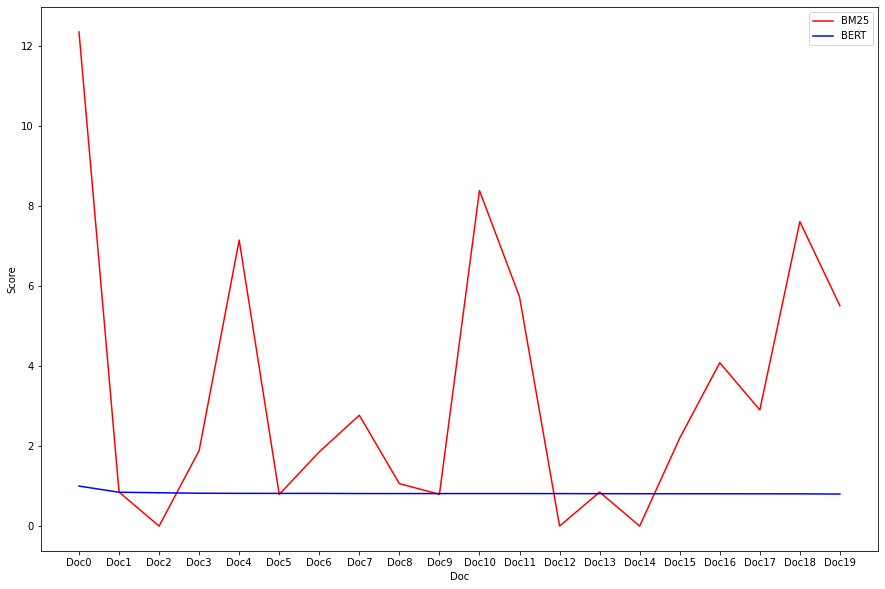

In [ ]:
import matplotlib.pyplot as plt
Score1 = data_score_taylor['Score'][:20]
Score2 = taylor['Cosine Similarity'][:20]
Doc = data_score_taylor['doc_id'][:20]

fig = plt.figure(figsize=(15,10))
plt.title = "BM25 vs BERT Dataset Taylor Swift"
plt.plot(Doc, Score1, color = 'red', label = 'BM25')
plt.plot(Doc, Score2, color = 'blue', label = 'BERT')
plt.xlabel('Doc')
plt.ylabel('Score')
plt.legend(['BM25', 'BERT'], loc = 'upper right')
plt.show()